<a href="https://colab.research.google.com/github/Karthikreddy1010/Email-spam-detection/blob/main/email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade numpy gensim spacy scikit-learn tensorflow plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 787.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 80.1 kB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.4 MB/

In [ ]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade gensim --force-reinstall


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 16.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling n

In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import string
import email.utils
import warnings
import pickle
from datetime import datetime
from collections import Counter
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import urllib.parse
from tld import get_tld
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import joblib

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Initialize tqdm for pandas
tqdm.pandas()

# Load English language model for spaCy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
# Load the data
print("Loading data...")
try:
    data = pd.read_csv("CEAS_08.csv")
    print("Initial data shape:", data.shape)
    print("\nSample data before cleaning:")
    print(data.head())
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Loading data...
Initial data shape: (39154, 7)

Sample data before cleaning:
                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                      

In [ ]:
# Enhanced datetime conversion
def convert_to_datetime(series):
    print("\nAttempting datetime conversion...")
    converted = pd.to_datetime(series, infer_datetime_format=True, errors='coerce')

    if converted.isna().any():
        def parse_email_date(date_str):
            try:
                parsed = email.utils.parsedate_to_datetime(str(date_str))
                return parsed if parsed else pd.NaT
            except:
                return pd.NaT

        mask = converted.isna()
        email_parsed = series[mask].apply(parse_email_date)
        converted[mask] = email_parsed

    return converted

# Enhanced URL detection
def detect_suspicious_urls(text):
    if not isinstance(text, str):
        return {'count': 0, 'suspicious': 0, 'details': []}

    url_pattern = r'(https?://\S+|www\.\S+|\S+\.(com|net|org|info|biz|ru|cn|xyz)\S*)'
    urls = re.findall(url_pattern, text.lower())
    urls = [url[0] for url in urls]

    results = {'count': len(urls), 'suspicious': 0, 'details': []}
    suspicious_domains = ['bit.ly', 'tinyurl', 'goo.gl', 't.co', 'click', 'url', 'link']
    ip_pattern = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'

    for url in urls:
        url_info = {'url': url, 'is_suspicious': False, 'reasons': []}

        try:
            if re.search(ip_pattern, url):
                url_info['is_suspicious'] = True
                url_info['reasons'].append('ip_address')

            domain = urllib.parse.urlparse(url).netloc
            if any(sd in domain for sd in suspicious_domains):
                url_info['is_suspicious'] = True
                url_info['reasons'].append('suspicious_domain')

            try:
                res = get_tld(url, as_object=True)
                if res.tld in ['ru', 'cn', 'info', 'biz']:
                    url_info['is_suspicious'] = True
                    url_info['reasons'].append('suspicious_tld')
            except:
                pass

            if '@' in url:
                url_info['is_suspicious'] = True
                url_info['reasons'].append('obfuscation')

            if re.search(r'[0-9a-f]{8,}', url.split('/')[-1]):
                url_info['is_suspicious'] = True
                url_info['reasons'].append('hex_encoded')

            if url_info['is_suspicious']:
                results['suspicious'] += 1

            results['details'].append(url_info)
        except:
            continue

    return results

# Enhanced text preprocessing
def enhanced_preprocess(text):
    if not isinstance(text, str):
        return ""

    # Remove email headers
    if text.startswith(('From:', 'Return-Path:', 'Delivered-To:')):
        text = '\n'.join([line for line in text.split('\n')
                        if not line.startswith(('From:', 'Return-Path:', 'Delivered-To:', 'Received:'))])

    # Clean text
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML
    text = text.lower()
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', ' ', text)  # Remove emails
    text = re.sub(r'http[s]?://\S+', ' ', text)  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and lemmatize with enhanced stop words
    custom_stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)
    custom_stop_words.update(['please', 'thank', 'thanks', 'regards', 'dear', 'hello', 'hi', 'best', 'kind', 'sincerely'])

    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in custom_stop_words
              and not token.is_punct and token.is_alpha and len(token.text) > 2]

    return " ".join(tokens)

# Main cleaning function
def clean_data(df):
    print("\nCleaning data...")

    # Handle missing values
    df['receiver'] = df['receiver'].fillna('unknown')
    df['subject'] = df['subject'].fillna('')
    df['body'] = df['body'].fillna('')

    # Convert date
    df['date'] = convert_to_datetime(df['date'])

    # Apply text cleaning
    print("\nCleaning text columns...")
    df['processed_text'] = df['body'].progress_apply(enhanced_preprocess)
    df['processed_subject'] = df['subject'].progress_apply(enhanced_preprocess)

    # URL detection
    print("\nDetecting suspicious URLs...")
    url_results = df['body'].progress_apply(detect_suspicious_urls)
    df['url_count'] = url_results.apply(lambda x: x['count'])
    df['suspicious_url_count'] = url_results.apply(lambda x: x['suspicious'])
    df['url_details'] = url_results.apply(lambda x: x['details'])
    df['has_suspicious_url'] = df['suspicious_url_count'].apply(lambda x: 1 if x > 0 else 0)

    return df

# Clean the data
try:
    data = clean_data(data)
    print("\nAfter cleaning:")
    print("Data shape:", data.shape)
except Exception as e:
    print(f"\nData cleaning failed: {e}")
    raise


Cleaning data...

Attempting datetime conversion...

Cleaning text columns...


100%|██████████| 39154/39154 [01:26<00:00, 450.80it/s]



Detecting suspicious URLs...


100%|██████████| 39154/39154 [00:06<00:00, 5746.89it/s]



After cleaning:
Data shape: (39154, 13)


In [ ]:
# Function for EDA plots
def plot_eda(df):
    print("\nGenerating EDA visualizations...")
    plt.figure(figsize=(20, 16))

    # Set color palette
    spam_color = '#FF6B6B'  # Red for spam
    ham_color = '#4ECDC4'   # Teal for ham

    # 1. Label distribution
    plt.subplot(3, 3, 1)
    sns.countplot(data=df, x='label', palette=[ham_color, spam_color])
    plt.title("Email Labels Distribution (0=Ham, 1=Spam)")
    plt.xticks([0, 1], ['Ham', 'Spam'])

    # 2. Email volume by hour
    plt.subplot(3, 3, 2)
    df['hour'] = df['date'].dt.hour
    df['hour'].value_counts().sort_index().plot(kind='bar', color='#6A0572')
    plt.title("Email Volume by Hour")

    # 3. Body length distribution by label
    plt.subplot(3, 3, 3)
    df['body_length'] = df['body'].str.len()
    sns.histplot(data=df[df['body_length'] < 10000], x='body_length', hue='label',
                 palette=[ham_color, spam_color], bins=50, kde=True)
    plt.title("Body Length Distribution by Label")
    plt.legend(['Ham', 'Spam'])

    # 4. URL analysis
    plt.subplot(3, 3, 4)
    df['has_suspicious_url'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                                colors=['#F7D488', '#FF9A8B'])
    plt.title("Emails with Suspicious URLs")

    # 5. Spam vs Ham length comparison
    plt.subplot(3, 3, 5)
    sns.boxplot(data=df[df['body_length'] < 5000], x='label', y='body_length',
                palette=[ham_color, spam_color])
    plt.title("Body Length by Email Type")
    plt.xticks([0, 1], ['Ham', 'Spam'])

    # 6. Suspicious URL count by label
    plt.subplot(3, 3, 6)
    sns.boxplot(data=df, x='label', y='suspicious_url_count',
                palette=[ham_color, spam_color])
    plt.title("Suspicious URL Count by Email Type")
    plt.xticks([0, 1], ['Ham', 'Spam'])

    plt.tight_layout()
    plt.show()

# Function for word clouds
def generate_word_clouds(df, text_column='processed_text', label_column='label'):
    print("\nGenerating word clouds...")

    # Split data into spam (1) and ham (0)
    spam_texts = df[df[label_column] == 1][text_column].astype(str)
    ham_texts = df[df[label_column] == 0][text_column].astype(str)

    # Filter out empty texts
    spam_texts = spam_texts[spam_texts.str.strip().astype(bool)]
    ham_texts = ham_texts[ham_texts.str.strip().astype(bool)]

    # Combine texts
    spam_text = ' '.join(spam_texts)
    ham_text = ' '.join(ham_texts)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # Generate and plot spam word cloud (red colors)
    if len(spam_text.split()) >= 5:
        spam_wc = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='Reds',
                          max_words=100).generate(spam_text)
        axes[0].imshow(spam_wc, interpolation='bilinear')
        axes[0].set_title("Spam Email Word Cloud", size=20)
        axes[0].axis("off")
    else:
        axes[0].text(0.5, 0.5, "Not enough spam words\nto generate word cloud",
                    ha='center', va='center', fontsize=12)
        axes[0].axis("off")

    # Generate and plot ham word cloud (green colors)
    if len(ham_text.split()) >= 5:
        ham_wc = WordCloud(width=800, height=400,
                         background_color='white',
                         colormap='Greens',
                         max_words=100).generate(ham_text)
        axes[1].imshow(ham_wc, interpolation='bilinear')
        axes[1].set_title("Ham Email Word Cloud", size=20)
        axes[1].axis("off")
    else:
        axes[1].text(0.5, 0.5, "Not enough ham words\nto generate word cloud",
                    ha='center', va='center', fontsize=12)
        axes[1].axis("off")

    plt.tight_layout()
    plt.show()

# Run EDA
if pd.api.types.is_datetime64_any_dtype(data['date']):
    plot_eda(data)
    generate_word_clouds(data)

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.7 MB/s eta 0:00:00


In [ ]:
print("\nEngineering features...")
try:
    # Length features
    data['body_length'] = data['body'].str.len()
    data['subject_length'] = data['subject'].str.len()

    # Time features
    if pd.api.types.is_datetime64_any_dtype(data['date']):
        data['hour_sent'] = data['date'].dt.hour
        data['day_of_week'] = data['date'].dt.dayofweek
        data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

    # Content flags
    data['has_urgent'] = data['subject'].str.contains('urgent').astype(int)
    data['has_attachment'] = data['body'].str.contains('attach').astype(int)

    print("\nSample features:")
    print(data[['body_length', 'subject_length', 'url_count',
               'suspicious_url_count', 'has_suspicious_url']].head())
except Exception as e:
    print(f"Error in feature engineering: {e}")
    raise


Engineering features...

Sample features:
   body_length  subject_length  url_count  suspicious_url_count  \
0          273              25          1                     0   
1           82              22          1                     0   
2         3918              20         27                     1   
3        24418             150        660                     1   
4          175              26          1                     0   

   has_suspicious_url  
0                   0  
1                   0  
2                   1  
3                   1  
4                   0  


Training Word2Vec model...
Word2Vec training complete!


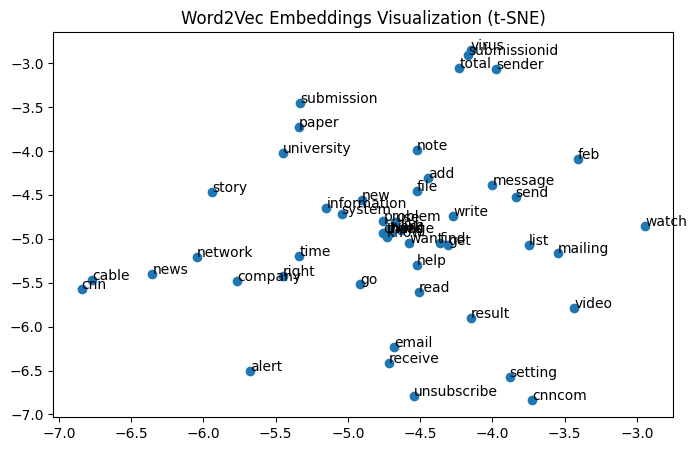

In [ ]:
# Cell 5: Word2Vec Implementation and Visualization (Fixed)

# Prepare sentences for Word2Vec
sentences = [text.split() for text in data['processed_text'] if isinstance(text, str)]

# Train Word2Vec model
print("Training Word2Vec model...")
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4, sg=1, epochs=20)
print("Word2Vec training complete!")

# Visualization function (fixed)
def plot_word2vec(model, words=50):
    # Get words and vectors
    words = list(model.wv.key_to_index.keys())[:words]
    word_vectors = np.array([model.wv[word] for word in words])  # Convert to numpy array

    # Reduce dimensionality with t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(word_vectors)-1))
    vectors_2d = tsne.fit_transform(word_vectors)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o')

    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.title("Word2Vec Embeddings Visualization (t-SNE)")
    plt.show()

# Visualize embeddings
if len(w2v_model.wv.key_to_index) > 0:
    plot_word2vec(w2v_model, words=min(50, len(w2v_model.wv.key_to_index)))
else:
    print("No words found in vocabulary - cannot visualize embeddings")

Training Random Forest...

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3490
           1       0.98      1.00      0.99      4341

    accuracy                           0.98      7831
   macro avg       0.99      0.98      0.98      7831
weighted avg       0.98      0.98      0.98      7831

Accuracy: 0.98
AUC: 1.00


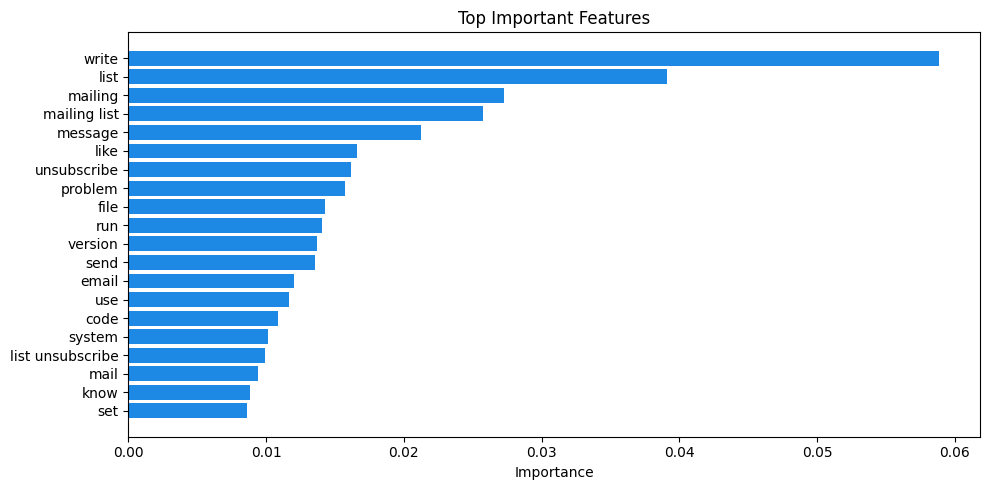

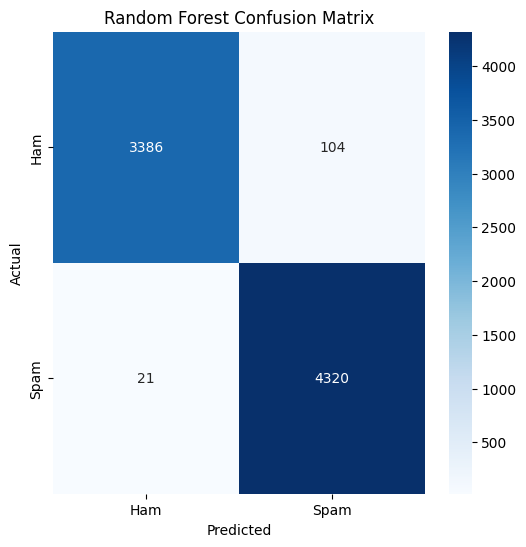

In [ ]:
# Prepare data
X = data['processed_text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=30,
                                min_samples_split=5, class_weight='balanced',
                                random_state=42, n_jobs=-1))
])

# Train
print("Training Random Forest...")
rf_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = rf_pipeline.predict(X_test)
y_proba = rf_pipeline.predict_proba(X_test)[:, 1]

print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.2f}")

# Feature importance visualization
feature_names = rf_pipeline.named_steps['tfidf'].get_feature_names_out()
importances = rf_pipeline.named_steps['rf'].feature_importances_
top_n = 20

indices = np.argsort(importances)[-top_n:]
plt.figure(figsize=(10, 5))
plt.title("Top Important Features")
plt.barh(range(top_n), importances[indices], align='center', color='#1E88E5')
plt.yticks(range(top_n), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       123,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,675,649 (6.39 MB)

 Trainable params: 1,675,393 (6.39 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 629s 2s/step - AUC: 0.9669 - accuracy: 0.9232 - loss: 0.5579 - val_AUC: 0.9976 - val_accuracy: 0.9770 - val_loss: 0.0883
Epoch 2/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - AUC: 0.9988 - accuracy: 0.9955 - loss: 0.0324 - val_AUC: 0.9979 - val_accuracy: 0.9941 - val_loss: 0.0327
Epoch 3/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 611s 2s/step - AUC: 0.9995 - accuracy: 0.9973 - loss: 0.0183 - val_AUC: 0.9980 - val_accuracy: 0.9925 - val_loss: 0.0318
245/245 ━━━━━━━━━━━━━━━━━━━━ 47s 186ms/step

LSTM Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3490
           1       1.00      0.99      0.99      4341

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99      7831

Accuracy: 0.99
AUC: 1.00


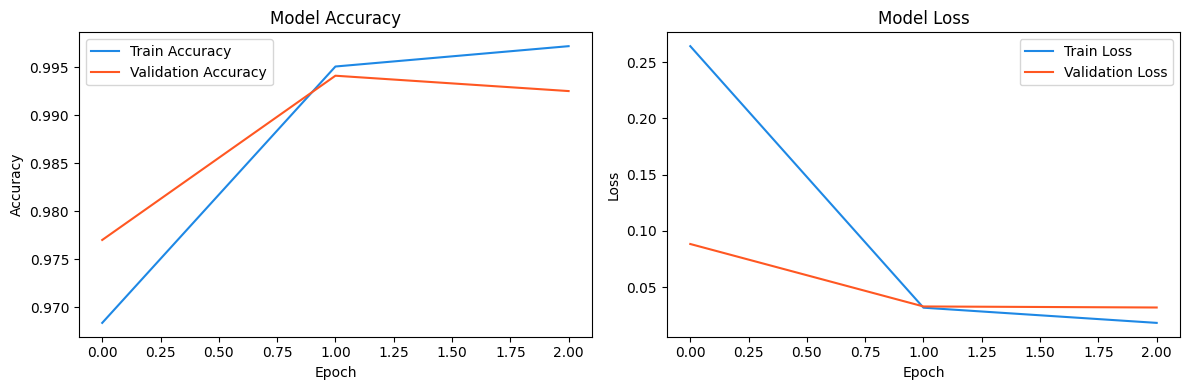

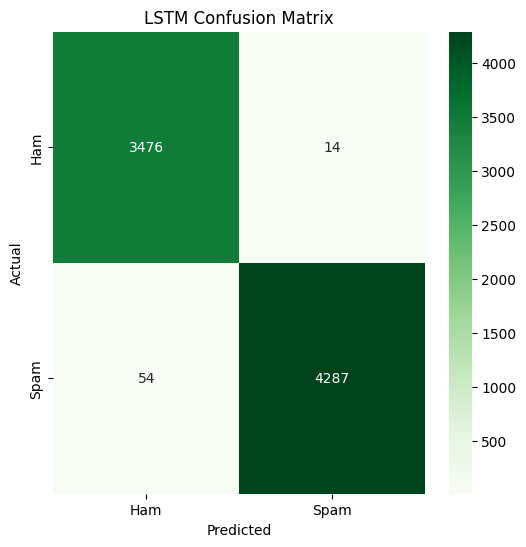

In [ ]:
# Prepare the data for LSTM
max_words = 10000
max_len = 200

# Split data first
X_train_text, X_test_text, y_train, y_test = train_test_split(
    data['processed_text'],
    data['label'],
    test_size=0.2,
    random_state=42
)

# Fit tokenizer only on training data
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text)

# Convert to sequences and pad
X_train = pad_sequences(
    tokenizer.texts_to_sequences(X_train_text),
    maxlen=max_len,
    padding='post',
    truncating='post'
)
X_test = pad_sequences(
    tokenizer.texts_to_sequences(X_test_text),
    maxlen=max_len,
    padding='post',
    truncating='post'
)

# Build the model
def build_lstm_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        BatchNormalization(),
        Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)),
        Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.1)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )
    return model

# Instantiate and train the model
lstm_model = build_lstm_model()
lstm_model.build(input_shape=(None, max_len))
lstm_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = lstm_model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate
y_pred = lstm_model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

print("\nLSTM Evaluation:")
print(classification_report(y_test, y_pred_class))
print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.2f}")
print(f"AUC: {roc_auc_score(y_test, y_pred):.2f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1E88E5')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#FF5722')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='#1E88E5')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#FF5722')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

245/245 ━━━━━━━━━━━━━━━━━━━━ 44s 180ms/step
Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3490
           1       0.99      0.99      0.99      4341

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99      7831

Accuracy: 0.99
AUC: 1.00

LSTM Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3490
           1       1.00      0.99      0.99      4341

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99      7831

Accuracy: 0.99
AUC: 1.00

Ensemble Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3490
           1       1.00      0.99      0.99      4341

    accuracy          

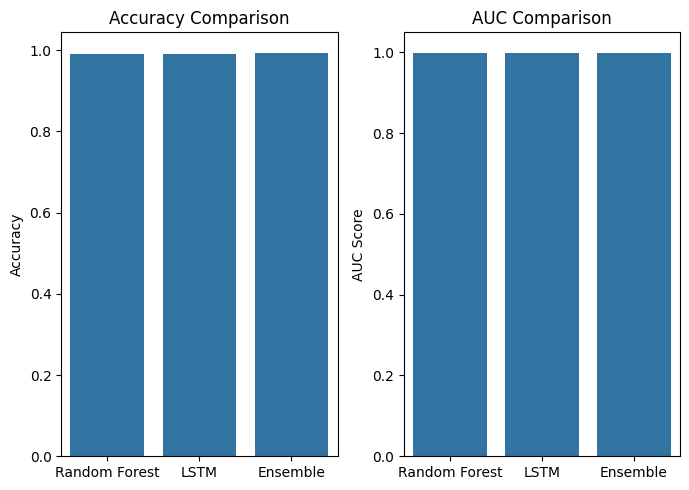

In [ ]:
# 1. First ensure you have the Random Forest pipeline properly defined and trained
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Define the RF pipeline (if not already done)
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the RF model on the text data (X_train_text)
rf_pipeline.fit(X_train_text, y_train)

# 2. Now get predictions from both models using the correct inputs
# For Random Forest - use the raw text (X_test_text)
rf_preds = rf_pipeline.predict(X_test_text)
rf_probs = rf_pipeline.predict_proba(X_test_text)[:, 1]

# For LSTM - use the padded sequences (X_test)
lstm_probs = lstm_model.predict(X_test).flatten()
lstm_preds = (lstm_probs > 0.5).astype(int)

# 3. Create ensemble
ensemble_probs = (rf_probs + lstm_probs) / 2
ensemble_preds = (ensemble_probs > 0.5).astype(int)

# 4. Evaluate all models
print("Random Forest Evaluation:")
print(classification_report(y_test, rf_preds))
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.2f}")
print(f"AUC: {roc_auc_score(y_test, rf_probs):.2f}\n")

print("LSTM Evaluation:")
print(classification_report(y_test, lstm_preds))
print(f"Accuracy: {accuracy_score(y_test, lstm_preds):.2f}")
print(f"AUC: {roc_auc_score(y_test, lstm_probs):.2f}\n")

print("Ensemble Evaluation:")
print(classification_report(y_test, ensemble_preds))
print(f"Accuracy: {accuracy_score(y_test, ensemble_preds):.2f}")
print(f"AUC: {roc_auc_score(y_test, ensemble_probs):.2f}\n")

# 5. Plot comparison
models = ['Random Forest', 'LSTM', 'Ensemble']
accuracies = [
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, lstm_preds),
    accuracy_score(y_test, ensemble_preds)
]
aucs = [
    roc_auc_score(y_test, rf_probs),
    roc_auc_score(y_test, lstm_probs),
    roc_auc_score(y_test, ensemble_probs)
]

plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracies)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=aucs)
plt.title("AUC Comparison")
plt.ylabel("AUC Score")

plt.tight_layout()
plt.show()

245/245 ━━━━━━━━━━━━━━━━━━━━ 44s 179ms/step
Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3490
           1       0.99      0.99      0.99      4341

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99      7831

Accuracy: 0.99
AUC: 1.00

LSTM Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3490
           1       1.00      0.99      0.99      4341

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99      7831

Accuracy: 0.99
AUC: 1.00

Ensemble Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3490
           1       1.00      0.99      0.99      4341

    accuracy          

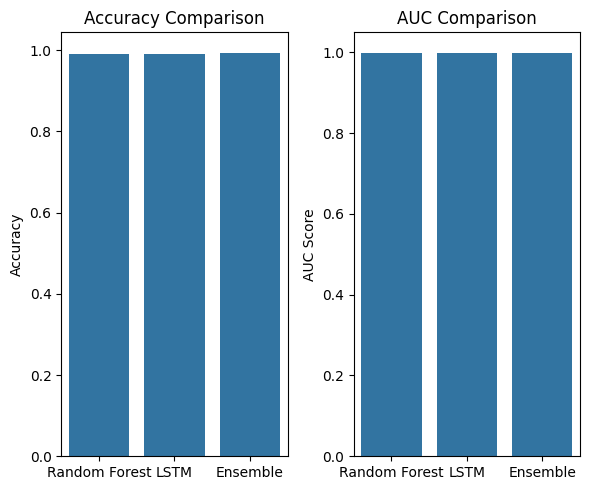

In [ ]:
# Cell 9: Ensemble Model
# Get predictions from both models
rf_preds = rf_pipeline.predict(X_test_text)
rf_probs = rf_pipeline.predict_proba(X_test_text)[:, 1]

lstm_probs = lstm_model.predict(X_test).flatten()
lstm_preds = (lstm_probs > 0.5).astype(int)

# Create ensemble
ensemble_probs = (rf_probs + lstm_probs) / 2
ensemble_preds = (ensemble_probs > 0.5).astype(int)

# Evaluate all models
print("Random Forest Evaluation:")
print(classification_report(y_test, rf_preds))
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.2f}")
print(f"AUC: {roc_auc_score(y_test, rf_probs):.2f}\n")

print("LSTM Evaluation:")
print(classification_report(y_test, lstm_preds))
print(f"Accuracy: {accuracy_score(y_test, lstm_preds):.2f}")
print(f"AUC: {roc_auc_score(y_test, lstm_probs):.2f}\n")

print("Ensemble Evaluation:")
print(classification_report(y_test, ensemble_preds))
print(f"Accuracy: {accuracy_score(y_test, ensemble_preds):.2f}")
print(f"AUC: {roc_auc_score(y_test, ensemble_probs):.2f}\n")

# Plot comparison
models = ['Random Forest', 'LSTM', 'Ensemble']
accuracies = [
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, lstm_preds),
    accuracy_score(y_test, ensemble_preds)
]
aucs = [
    roc_auc_score(y_test, rf_probs),
    roc_auc_score(y_test, lstm_probs),
    roc_auc_score(y_test, ensemble_probs)
]

plt.figure(figsize=(6, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracies)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=aucs)
plt.title("AUC Comparison")
plt.ylabel("AUC Score")

plt.tight_layout()
plt.show()

In [ ]:
# Cell 9: Email Filter Class
class EmailFilter:
    def __init__(self, vectorizer, rf_model, lstm_model, tokenizer, max_len):
        self.vectorizer = vectorizer
        self.rf_model = rf_model
        self.lstm_model = lstm_model
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.nlp = spacy.load('en_core_web_sm')
        self.suspicious_keywords = ['urgent', 'password', 'verify', 'account', 'security', 'update',
                                  'login', 'confirm', 'bank', 'paypal', 'limited', 'offer',
                                  'free', 'winner', 'prize', 'selected', 'credit', 'card']
        self.common_spam_phrases = [
            'click here', 'unsubscribe', 'limited time', 'special offer',
            'money back', 'risk free', 'act now', 'dear friend',
            'you have won', 'congratulations', 'exclusive deal'
        ]
        self.url_pattern = r'(https?://\S+|www\.\S+|\S+\.(com|net|org|info|biz|ru|cn|xyz)\S*)'
        self.suspicious_domains = ['bit.ly', 'tinyurl', 'goo.gl', 't.co', 'click', 'url', 'link',
                                 'secure', 'account', 'login', 'verify', 'confirm', 'update']
        self.ip_pattern = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
        self.hex_pattern = r'[0-9a-f]{8,}'
        self.long_domain_threshold = 30

    def clean_text(self, text):
        if not isinstance(text, str):
            text = str(text)

        if text.startswith(('From:', 'Return-Path:', 'Delivered-To:')):
            text = '\n'.join([line for line in text.split('\n')
                            if not line.startswith(('From:', 'Return-Path:', 'Delivered-To:', 'Received:'))])

        text = re.sub(r'<[^>]+>', '', text)
        text = re.sub(r'http[s]?://\S+', ' ', text)
        text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', ' ', text)
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\s+', ' ', text).strip()
        text = re.sub(r'\b\d+\b', '', text)
        return text

    def preprocess_text(self, text):
        text = self.clean_text(text)
        doc = self.nlp(text)
        filtered_tokens = [token.lemma_ for token in doc
                          if not token.is_stop and not token.is_punct and token.is_alpha]
        return " ".join(filtered_tokens)

    def analyze_urls(self, text):
        if not isinstance(text, str):
            return {
                'count': 0,
                'suspicious_count': 0,
                'suspicious_ratio': 0,
                'classifications': {},
                'url_details': []
            }

        urls = re.findall(self.url_pattern, text.lower())
        urls = [url[0] for url in urls]

        results = {
            'count': len(urls),
            'suspicious_count': 0,
            'suspicious_ratio': 0,
            'classifications': Counter(),
            'url_details': []
        }

        for url in urls:
            url_info = {
                'url': url,
                'classification': 'normal',
                'reasons': []
            }

            if any(domain in url for domain in self.suspicious_domains):
                url_info['classification'] = 'suspicious'
                url_info['reasons'].append('suspicious_domain')

            if re.search(self.ip_pattern, url):
                url_info['classification'] = 'suspicious'
                url_info['reasons'].append('contains_ip')

            if re.search(self.hex_pattern, url.split('/')[-1]):
                url_info['classification'] = 'suspicious'
                url_info['reasons'].append('hex_encoded')

            if len(url.split('/')[0]) > self.long_domain_threshold:
                url_info['classification'] = 'suspicious'
                url_info['reasons'].append('long_domain')

            if '@' in url or '=' in url or '&' in url:
                url_info['classification'] = 'suspicious'
                url_info['reasons'].append('obfuscated')

            if url_info['classification'] == 'suspicious':
                results['suspicious_count'] += 1
                for reason in url_info['reasons']:
                    results['classifications'][reason] += 1

            results['url_details'].append(url_info)

        results['suspicious_ratio'] = results['suspicious_count'] / (results['count'] or 1)
        return results

    def contains_suspicious_content(self, text):
        text = text.lower()
        keyword_hits = sum(1 for keyword in self.suspicious_keywords if keyword in text)
        phrase_hits = sum(1 for phrase in self.common_spam_phrases if phrase in text)
        capital_ratio = sum(1 for c in text if c.isupper()) / len(text) if text else 0

        return {
            'suspicious_keywords': keyword_hits,
            'spam_phrases': phrase_hits,
            'excessive_caps': capital_ratio > 0.3,
            'total_red_flags': keyword_hits + phrase_hits + (1 if capital_ratio > 0.3 else 0)
        }

    def categorize_email(self, email_data):
        subject = email_data.get('subject', '').lower()
        body = email_data.get('body', '').lower()

        categories = []
        financial_terms = ['bank', 'paypal', 'credit card', 'account', 'payment']
        if any(term in subject or term in body for term in financial_terms):
            categories.append('financial_scam')

        phishing_terms = ['login', 'password', 'verify', 'confirm', 'security']
        if any(term in subject or term in body for term in phishing_terms):
            categories.append('phishing')

        lottery_terms = ['winner', 'prize', 'selected', 'congratulations']
        if any(term in subject or term in body for term in lottery_terms):
            categories.append('lottery_scam')

        urgent_terms = ['urgent', 'immediate action', 'limited time']
        if any(term in subject or term in body for term in urgent_terms):
            categories.append('urgent_action')

        if not categories and email_data.get('is_spam_ensemble', False):
            categories.append('general_spam')

        return categories if categories else ['ham']

    def filter_email(self, email_data):
        try:
            sender = email_data.get('sender', '')
            receiver = email_data.get('receiver', '')
            date = email_data.get('date', datetime.now())
            subject = email_data.get('subject', '')
            body = email_data.get('body', '')

            processed_subject = self.preprocess_text(subject)
            processed_body = self.preprocess_text(body)
            full_text = f"{processed_subject} {processed_body}"

            X_email = self.vectorizer.transform([full_text])
            seq = self.tokenizer.texts_to_sequences([full_text])
            padded = pad_sequences(seq, maxlen=self.max_len)

            spam_pred_rf = self.rf_model.predict(X_email)[0]
            spam_prob_rf = self.rf_model.predict_proba(X_email)[0][1]

            spam_prob_lstm = self.lstm_model.predict(padded, verbose=0)[0][0]
            spam_pred_lstm = 1 if spam_prob_lstm > 0.5 else 0

            spam_prob_ensemble = (spam_prob_rf + spam_prob_lstm) / 2
            spam_pred_ensemble = 1 if spam_prob_ensemble > 0.5 else 0

            url_analysis = self.analyze_urls(f"{subject} {body}")
            content_analysis = self.contains_suspicious_content(f"{subject} {body}")
            categories = self.categorize_email({
                'subject': subject,
                'body': body,
                'is_spam_ensemble': bool(spam_pred_ensemble)
            })

            should_filter = False
            filter_reasons = []

            if spam_pred_ensemble == 1:
                should_filter = True
                filter_reasons.append(f"Spam classification (probability: {spam_prob_ensemble:.2f})")

            if url_analysis['suspicious_ratio'] > 0.5:
                should_filter = True
                filter_reasons.append(f"Suspicious URLs ({url_analysis['suspicious_count']}/{url_analysis['count']} suspicious)")

            if 'contains_ip' in url_analysis['classifications']:
                should_filter = True
                filter_reasons.append("URL contains IP address")

            if 'hex_encoded' in url_analysis['classifications']:
                should_filter = True
                filter_reasons.append("Hex-encoded URL detected")

            if content_analysis['total_red_flags'] > 2:
                should_filter = True
                filter_reasons.append(f"Suspicious content (flags: {content_analysis['total_red_flags']})")

            result = {
                'sender': sender,
                'receiver': receiver,
                'date': date.strftime('%Y-%m-%d %H:%M:%S') if isinstance(date, datetime) else str(date),
                'subject': subject,
                'body_preview': body[:100] + '...' if len(body) > 100 else body,
                'processed_text': full_text,
                'is_spam_rf': bool(spam_pred_rf),
                'spam_probability_rf': float(spam_prob_rf),
                'is_spam_lstm': bool(spam_pred_lstm),
                'spam_probability_lstm': float(spam_prob_lstm),
                'is_spam_ensemble': bool(spam_pred_ensemble),
                'spam_probability_ensemble': float(spam_prob_ensemble),
                'url_analysis': {
                    'total_urls': url_analysis['count'],
                    'suspicious_urls': url_analysis['suspicious_count'],
                    'suspicious_ratio': url_analysis['suspicious_ratio'],
                    'classifications': dict(url_analysis['classifications']),
                    'suspicious_url_details': [u for u in url_analysis['url_details'] if u['classification'] == 'suspicious']
                },
                'content_analysis': content_analysis,
                'categories': categories,
                'should_filter': should_filter,
                'filter_reasons': filter_reasons,
                'filter_action': 'Move to Spam' if should_filter else 'Deliver to Inbox',
                'processing_time': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                'model_used': 'RandomForest+LSTM Ensemble'
            }

            return result

        except Exception as e:
            return {
                'error': str(e),
                'original_data': email_data,
                'processing_time': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            }

# Initialize the filter
print("\nInitializing EmailFilter...")
email_filter = EmailFilter(
    vectorizer=rf_pipeline.named_steps['tfidf'],
    rf_model=rf_pipeline.named_steps['clf'],
    lstm_model=lstm_model,
    tokenizer=tokenizer,
    max_len=max_len
)

# Demo with sample emails
sample_emails = data.sample(5).to_dict('records')
print("\nEmail Filter Demo Results:")
for i, email in enumerate(sample_emails, 1):
    result = email_filter.filter_email(email)
    print(f"\n{'='*80}\nEmail #{i} Analysis:")
    print(f"From: {result.get('sender', 'N/A')}")
    print(f"To: {result.get('receiver', 'N/A')}")
    print(f"Subject: {result.get('subject', 'N/A')}")
    print(f"RF Spam: {'Yes' if result.get('is_spam_rf', False) else 'No'} (Probability: {result.get('spam_probability_rf', 0):.2f})")
    print(f"LSTM Spam: {'Yes' if result.get('is_spam_lstm', False) else 'No'} (Probability: {result.get('spam_probability_lstm', 0):.2f})")
    print(f"Ensemble Decision: {'SPAM' if result.get('is_spam_ensemble', False) else 'HAM'} (Probability: {result.get('spam_probability_ensemble', 0):.2f})")
    print(f"Final Action: {result.get('filter_action', 'N/A')}")
    if result.get('filter_reasons'):
        print(f"Reasons: {', '.join(result.get('filter_reasons', []))}")
    print("="*80)


Initializing EmailFilter...

Email Filter Demo Results:

Email #1 Analysis:
From: Steve Hay <rybvejul@planit.com>
To: tiugbhf-kgqkygc@perl.org
Subject: Smoke [5.8.8] 32025 FAIL(FM) MSWin32 WinXP/.Net SP2 (x86/2 cpu)
RF Spam: No (Probability: 0.00)
LSTM Spam: No (Probability: 0.00)
Ensemble Decision: HAM (Probability: 0.00)
Final Action: Deliver to Inbox

Email #2 Analysis:
From: Ernestine Ackerman <NicholeantisemitismCarmichael@aaamath.com>
To: user2.4@gvc.ceas-challenge.cc
Subject: jurisprudent chattanooga ned aboveboard sheath
RF Spam: Yes (Probability: 0.93)
LSTM Spam: Yes (Probability: 0.50)
Ensemble Decision: SPAM (Probability: 0.72)
Final Action: Move to Spam
Reasons: Spam classification (probability: 0.72)

Email #3 Analysis:
From: Eugen Leitl <vnngx@leitl.org>
To: wsye@xent.com
Subject: Re: [FoRK] Book Mooch
RF Spam: No (Probability: 0.01)
LSTM Spam: No (Probability: 0.22)
Ensemble Decision: HAM (Probability: 0.11)
Final Action: Deliver to Inbox

Email #4 Analysis:
From: qydlq

In [ ]:
# Cell 10: Parallel Processing and Analysis
!pip install joblib
from joblib import Parallel, delayed # Import Parallel and delayed from joblib

def process_emails_parallel(df, email_filter, n_jobs=-1, batch_size=1000):
    def process_single(email):
        try:
            result = email_filter.filter_email(email)
            result.setdefault('error', None)
            result.setdefault('should_filter', False)
            result.setdefault('processed', True)
            return result
        except Exception as e:
            return {
                'error': str(e),
                'original_data': email,
                'should_filter': False,
                'processed': False
            }

    emails = df.to_dict('records')
    results = []

    for i in tqdm(range(0, len(emails), batch_size), desc="Processing Batches"):
        batch = emails[i:i + batch_size]
        batch_results = Parallel(n_jobs=n_jobs)( # Now Parallel is defined
            delayed(process_single)(email) for email in batch
        )
        results.extend(batch_results)

    results_df = pd.DataFrame(results)
    if 'processed' not in results_df.columns:
        results_df['processed'] = results_df['error'].isna()

    return results_df

# Process emails
print("\nProcessing emails in parallel...")
results_df = process_emails_parallel(data, email_filter, n_jobs=4, batch_size=100)

# Save results
results_file = "email_processing_results.pkl"
results_df.to_pickle(results_file)
print(f"\nSaved results to {results_file}")

# Analysis
if not results_df.empty:
    success_rate = results_df['processed'].mean() if 'processed' in results_df.columns else 0
    print(f"\nProcessing success rate: {success_rate:.1%}")

    if 'should_filter' in results_df.columns:
        spam_count = results_df['should_filter'].sum()
        print(f"Spam detected: {spam_count} ({spam_count/len(results_df):.1%})")

        if 'categories' in results_df.columns:
            print("\nTop spam categories:")
            print(results_df[results_df['should_filter']]
                  .explode('categories')['categories']
                  .value_counts().head(10))
    else:
        print("\nNo spam detection results available")
else:
    print("\nNo results to analyze")


Processing emails in parallel...


Processing Batches:   3%|▎         | 12/392 [12:11<6:18:30, 59.77s/it]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Cell 11: Interactive Visualization
def plot_filter_analysis(filtered_emails):
    if filtered_emails.empty:
        print("No emails were filtered in this sample")
        return

    fig = make_subplots(
        rows=3, cols=3,
        subplot_titles=(
            "Top Filter Reasons", "Spam Probability Distribution",
            "Suspicious URL Types", "Suspicious URL Ratio",
            "Content Analysis Flags", "Filtered Emails by Hour",
            "URL Count vs Spam Probability", "Email Categories",
            "Processing Results"
        )
    )

    # 1. Reasons for filtering
    reasons = filtered_emails['filter_reasons'].explode().value_counts().reset_index()
    fig.add_trace(
        go.Bar(
            x=reasons['count'],
            y=reasons['filter_reasons'],
            orientation='h',
            marker=dict(color='skyblue')
        ),
        row=1, col=1
    )

    # 2. Spam probability distribution
    fig.add_trace(
        go.Histogram(
            x=filtered_emails['spam_probability_ensemble'],
            marker=dict(color='lightgreen')
        ),
        row=1, col=2
    )

    # 3. URL classifications
    if 'url_analysis' in filtered_emails.columns:
        url_classes = pd.DataFrame(filtered_emails['url_analysis'].apply(
            lambda x: x.get('classifications', {}) if isinstance(x, dict) else {}
        ).tolist()).sum().sort_values().reset_index()
        fig.add_trace(
            go.Bar(
                x=url_classes[0],
                y=url_classes['index'],
                orientation='h',
                marker=dict(color='salmon')
            ),
            row=1, col=3
        )

    # 4. Suspicious URL ratio
    if 'url_analysis' in filtered_emails.columns:
        suspicious_ratios = filtered_emails['url_analysis'].apply(
            lambda x: x.get('suspicious_ratio', 0) if isinstance(x, dict) else 0
        )
        fig.add_trace(
            go.Histogram(
                x=suspicious_ratios,
                marker=dict(color='gold')
            ),
            row=2, col=1
        )

    # 5. Content analysis flags
    if 'content_analysis' in filtered_emails.columns:
        content_flags = pd.DataFrame(filtered_emails['content_analysis'].apply(
            lambda x: x if isinstance(x, dict) else {}
        ).tolist()).sum().sort_values().reset_index()
        fig.add_trace(
            go.Bar(
                x=content_flags[0],
                y=content_flags['index'],
                orientation='h',
                marker=dict(color='lightblue')
            ),
            row=2, col=2
        )

    # 6. Filtered emails by hour
    try:
        hour_counts = pd.to_datetime(filtered_emails['date']).dt.hour.value_counts().sort_index().reset_index()
        fig.add_trace(
            go.Scatter(
                x=hour_counts['index'],
                y=hour_counts['count'],
                mode='lines+markers',
                line=dict(color='orange', width=2),
                marker=dict(size=8)
            ),
            row=2, col=3
        )
    except:
        pass

    # 7. URL count vs spam probability
    if 'url_analysis' in filtered_emails.columns:
        url_counts = filtered_emails['url_analysis'].apply(
            lambda x: x.get('total_urls', 0) if isinstance(x, dict) else 0
        )
        fig.add_trace(
            go.Scatter(
                x=url_counts,
                y=filtered_emails['spam_probability_ensemble'],
                mode='markers',
                marker=dict(
                    color=filtered_emails['url_analysis'].apply(
                        lambda x: x.get('suspicious_ratio', 0) > 0.5 if isinstance(x, dict) else False
                    ).astype(int),
                    colorscale=['green', 'red']
                )
            ),
            row=3, col=1
        )

    # 8. Email categories
    if 'categories' in filtered_emails.columns:
        categories = filtered_emails.explode('categories')['categories'].value_counts().reset_index()
        fig.add_trace(
            go.Pie(
                labels=categories['index'],
                values=categories['categories'],
                marker=dict(colors=px.colors.qualitative.Pastel)
            ),
            row=3, col=2
        )

    # 9. Processing results
    fig.add_trace(
        go.Indicator(
            mode="number",
            value=len(filtered_emails),
            title={"text": "Total Filtered Emails"},
            domain={'row': 2, 'column': 3}
        ),
        row=3, col=3
    )

    fig.update_layout(
        height=1200,
        width=1400,
        title_text="Filtered Email Analysis Dashboard",
        showlegend=False,
        margin=dict(t=100, b=50)
    )

    fig.show()

# Run visualization
filtered_emails = results_df[results_df['should_filter'] == True]
plot_filter_analysis(filtered_emails)